<a href="https://colab.research.google.com/github/ishadhiwar/Health-Analyzer/blob/main/5%20factor%20contour%20logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5 factor examples


Regression Coefficients:
Intercept: 9.326427
Coefficient for X1: 0.000004
Coefficient for X2: 0.000075
Coefficient for X3: -0.000016
Coefficient for X4: -0.000000
Coefficient for X5: -0.000000
Coefficient for X1_X2: -0.000350
Coefficient for X1_X3: 0.000192
Coefficient for X1_X4: -0.000010
Coefficient for X1_X5: 0.000128
Coefficient for X2_X3: -0.000566
Coefficient for X2_X4: -0.000076
Coefficient for X2_X5: 0.002245
Coefficient for X3_X4: 0.000028
Coefficient for X3_X5: -0.000473
Coefficient for X4_X5: -0.000014


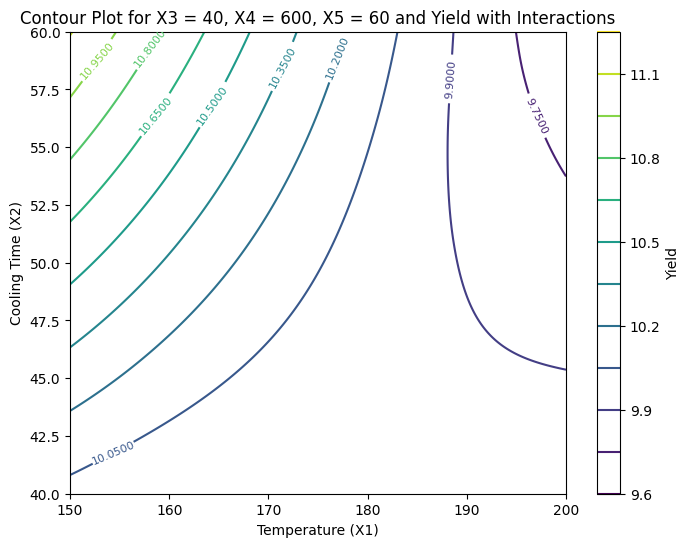

Contour data has been saved.


In [1]:
# 5 factor working code for cav 4 xyz dimension 2
# Holding factors at LOW

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from sklearn.linear_model import LinearRegression
import json

# Sample dataset with 5 factors
data = pd.DataFrame({
    'X1': [200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150],
    'X2': [60, 60, 60, 60, 60, 60, 60, 60, 40, 40, 40, 40, 40, 40, 40, 40, 60, 60, 60, 60, 60, 60, 60, 60, 40, 40, 40, 40, 40, 40, 40, 40],
    'X3': [80, 80, 80, 80, 40, 40, 40, 40, 80, 80, 80, 80, 40, 40, 40, 40, 80, 80, 80, 80, 40, 40, 40, 40, 80, 80, 80, 80, 40, 40, 40, 40],
    'X4': [1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600],
    'X5': [90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60],
    'Y': [9.466012, 9.31875, 9.731234, 9.937048, 9.921323, 9.64483, 10.2519, 10.43401,
          9.851124, 9.808968, 10.00342, 10.83812, 9.514689, 9.999063, 9.340273, 9.999751,
          9.733925, 10.13351, 10.47971, 9.93593, 10.95326, 11.10903, 10.07686, 9.838924,
          10.18816, 9.64998, 9.277254, 10.18001, 9.999484, 10.0066, 9.960045, 10.85053]
})

# Add interaction terms
data['X1_X2'] = data['X1'] * data['X2']
data['X1_X3'] = data['X1'] * data['X3']
data['X1_X4'] = data['X1'] * data['X4']
data['X1_X5'] = data['X1'] * data['X5']
data['X2_X3'] = data['X2'] * data['X3']
data['X2_X4'] = data['X2'] * data['X4']
data['X2_X5'] = data['X2'] * data['X5']
data['X3_X4'] = data['X3'] * data['X4']
data['X3_X5'] = data['X3'] * data['X5']
data['X4_X5'] = data['X4'] * data['X5']

# Prepare regression data
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X1_X2', 'X1_X3', 'X1_X4', 'X1_X5',
          'X2_X3', 'X2_X4', 'X2_X5', 'X3_X4', 'X3_X5', 'X4_X5']]
y = data['Y']

# Perform multiple linear regression
regressor = LinearRegression()
regressor.fit(X, y)

# Get regression coefficients and intercept
coefficients = regressor.coef_
intercept = regressor.intercept_

# Print regression results
print("Regression Coefficients:")
print(f"Intercept: {intercept:.6f}")
for i, col in enumerate(X.columns):
    print(f"Coefficient for {col}: {coefficients[i]:.6f}")

# Select specific values for X3, X4, X5
x3_value = 40
x4_value = 600
x5_value = 60
data_filtered = data[(data['X3'] == x3_value) & (data['X4'] == x4_value) & (data['X5'] == x5_value)]

# Extract filtered data points
X1 = data_filtered['X1'].values
X2 = data_filtered['X2'].values
Y = data_filtered['Y'].values

# Create a fine grid for X1 and X2
x1_range = np.linspace(min(X1), max(X1), 500)
x2_range = np.linspace(min(X2), max(X2), 500)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Interpolate Y values over the grid using cubic interpolation
y_grid = griddata((X1, X2), Y, (x1_grid, x2_grid), method='cubic')

# Generate contour plot
plt.figure(figsize=(8, 6))
num_contours = 10  # Number of contour levels
contour = plt.contour(x1_grid, x2_grid, y_grid, levels=num_contours, cmap='viridis')

# Extract the contour line data
def remove_duplicates(path):
    unique_points = list(dict.fromkeys(tuple(point) for point in path))
    return unique_points

contour_data = {}
for i, level in enumerate(contour.levels):
    paths = contour.allsegs[i]
    contour_data[f"Level {level:.4f}"] = [remove_duplicates(path.tolist()) for path in paths]

# Save contour data as JSON
contour_json = json.dumps(contour_data, indent=4)
file_path = "contour_data_with_interactions.json"  # Update the file path as needed
with open(file_path, "w") as f:
    f.write(contour_json)

# Show the contour plot
plt.clabel(contour, inline=True, fontsize=8, fmt="%.4f")  # Adding labels to the lines
plt.colorbar(contour, label='Yield')
plt.xlabel('Temperature (X1)')
plt.ylabel('Cooling Time (X2)')
plt.title(f'Contour Plot for X3 = {x3_value}, X4 = {x4_value}, X5 = {x5_value} and Yield with Interactions')
plt.show()

print("Contour data has been saved.")


In [2]:
# 5 factor working code for cav 4 xyz dimension 2
#Holding factors at MEDIUM

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from sklearn.linear_model import LinearRegression
import json

# Sample dataset with 5 factors
data = pd.DataFrame({
    'X1': [200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150],
    'X2': [60, 60, 60, 60, 60, 60, 60, 60, 40, 40, 40, 40, 40, 40, 40, 40, 60, 60, 60, 60, 60, 60, 60, 60, 40, 40, 40, 40, 40, 40, 40, 40],
    'X3': [80, 80, 80, 80, 40, 40, 40, 40, 80, 80, 80, 80, 40, 40, 40, 40, 80, 80, 80, 80, 40, 40, 40, 40, 80, 80, 80, 80, 40, 40, 40, 40],
    'X4': [1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600],
    'X5': [90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60],
    'Y': [9.466012, 9.31875, 9.731234, 9.937048, 9.921323, 9.64483, 10.2519, 10.43401,
          9.851124, 9.808968, 10.00342, 10.83812, 9.514689, 9.999063, 9.340273, 9.999751,
          9.733925, 10.13351, 10.47971, 9.93593, 10.95326, 11.10903, 10.07686, 9.838924,
          10.18816, 9.64998, 9.277254, 10.18001, 9.999484, 10.0066, 9.960045, 10.85053]
})

# Add interaction terms
data['X1_X2'] = data['X1'] * data['X2']
data['X1_X3'] = data['X1'] * data['X3']
data['X1_X4'] = data['X1'] * data['X4']
data['X1_X5'] = data['X1'] * data['X5']
data['X2_X3'] = data['X2'] * data['X3']
data['X2_X4'] = data['X2'] * data['X4']
data['X2_X5'] = data['X2'] * data['X5']
data['X3_X4'] = data['X3'] * data['X4']
data['X3_X5'] = data['X3'] * data['X5']
data['X4_X5'] = data['X4'] * data['X5']

# Prepare regression data
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X1_X2', 'X1_X3', 'X1_X4', 'X1_X5',
          'X2_X3', 'X2_X4', 'X2_X5', 'X3_X4', 'X3_X5', 'X4_X5']]
y = data['Y']

# Perform multiple linear regression
regressor = LinearRegression()
regressor.fit(X, y)

# Get regression coefficients and intercept
coefficients = regressor.coef_
intercept = regressor.intercept_

# Print regression results
print("Regression Coefficients:")
print(f"Intercept: {intercept:.6f}")
for i, col in enumerate(X.columns):
    print(f"Coefficient for {col}: {coefficients[i]:.6f}")

# Select specific values for X3, X4, X5
x3_value = 60
x4_value = 900
x5_value = 75
data_filtered = data[(data['X3'] == x3_value) & (data['X4'] == x4_value) & (data['X5'] == x5_value)]

# Extract filtered data points
X1 = data_filtered['X1'].values
X2 = data_filtered['X2'].values
Y = data_filtered['Y'].values

# Create a fine grid for X1 and X2
x1_range = np.linspace(min(X1), max(X1), 500)
x2_range = np.linspace(min(X2), max(X2), 500)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Interpolate Y values over the grid using cubic interpolation
y_grid = griddata((X1, X2), Y, (x1_grid, x2_grid), method='cubic')

# Generate contour plot
plt.figure(figsize=(8, 6))
num_contours = 10  # Number of contour levels
contour = plt.contour(x1_grid, x2_grid, y_grid, levels=num_contours, cmap='viridis')

# Extract the contour line data
def remove_duplicates(path):
    unique_points = list(dict.fromkeys(tuple(point) for point in path))
    return unique_points

contour_data = {}
for i, level in enumerate(contour.levels):
    paths = contour.allsegs[i]
    contour_data[f"Level {level:.4f}"] = [remove_duplicates(path.tolist()) for path in paths]

# Save contour data as JSON
contour_json = json.dumps(contour_data, indent=4)
file_path = "contour_data_with_interactions.json"  # Update the file path as needed
with open(file_path, "w") as f:
    f.write(contour_json)

# Show the contour plot
plt.clabel(contour, inline=True, fontsize=8, fmt="%.4f")  # Adding labels to the lines
plt.colorbar(contour, label='Yield')
plt.xlabel('Temperature (X1)')
plt.ylabel('Cooling Time (X2)')
plt.title(f'Contour Plot for X3 = {x3_value}, X4 = {x4_value}, X5 = {x5_value} and Yield with Interactions')
plt.show()

print("Contour data has been saved.")


Regression Coefficients:
Intercept: 9.326427
Coefficient for X1: 0.000004
Coefficient for X2: 0.000075
Coefficient for X3: -0.000016
Coefficient for X4: -0.000000
Coefficient for X5: -0.000000
Coefficient for X1_X2: -0.000350
Coefficient for X1_X3: 0.000192
Coefficient for X1_X4: -0.000010
Coefficient for X1_X5: 0.000128
Coefficient for X2_X3: -0.000566
Coefficient for X2_X4: -0.000076
Coefficient for X2_X5: 0.002245
Coefficient for X3_X4: 0.000028
Coefficient for X3_X5: -0.000473
Coefficient for X4_X5: -0.000014


ValueError: min() arg is an empty sequence

Regression Coefficients:
Intercept: 9.326427
Coefficient for X1: 0.000004
Coefficient for X2: 0.000075
Coefficient for X3: -0.000016
Coefficient for X4: -0.000000
Coefficient for X5: -0.000000
Coefficient for X1_X2: -0.000350
Coefficient for X1_X3: 0.000192
Coefficient for X1_X4: -0.000010
Coefficient for X1_X5: 0.000128
Coefficient for X2_X3: -0.000566
Coefficient for X2_X4: -0.000076
Coefficient for X2_X5: 0.002245
Coefficient for X3_X4: 0.000028
Coefficient for X3_X5: -0.000473
Coefficient for X4_X5: -0.000014


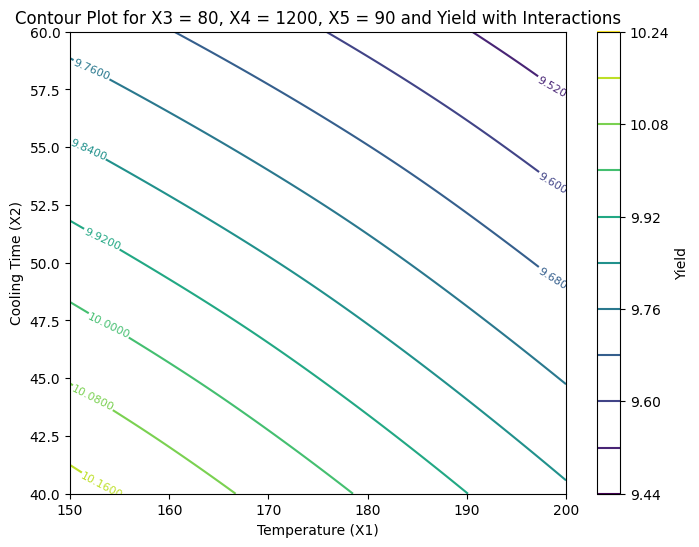

Contour data has been saved.


In [3]:
# 5 factor working code for cav 4 xyz dimension 2
#Holding the factors at HIGH

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from sklearn.linear_model import LinearRegression
import json

# Sample dataset with 5 factors
data = pd.DataFrame({
    'X1': [200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150],
    'X2': [60, 60, 60, 60, 60, 60, 60, 60, 40, 40, 40, 40, 40, 40, 40, 40, 60, 60, 60, 60, 60, 60, 60, 60, 40, 40, 40, 40, 40, 40, 40, 40],
    'X3': [80, 80, 80, 80, 40, 40, 40, 40, 80, 80, 80, 80, 40, 40, 40, 40, 80, 80, 80, 80, 40, 40, 40, 40, 80, 80, 80, 80, 40, 40, 40, 40],
    'X4': [1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600],
    'X5': [90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60],
    'Y': [9.466012, 9.31875, 9.731234, 9.937048, 9.921323, 9.64483, 10.2519, 10.43401,
          9.851124, 9.808968, 10.00342, 10.83812, 9.514689, 9.999063, 9.340273, 9.999751,
          9.733925, 10.13351, 10.47971, 9.93593, 10.95326, 11.10903, 10.07686, 9.838924,
          10.18816, 9.64998, 9.277254, 10.18001, 9.999484, 10.0066, 9.960045, 10.85053]
})

# Add interaction terms
data['X1_X2'] = data['X1'] * data['X2']
data['X1_X3'] = data['X1'] * data['X3']
data['X1_X4'] = data['X1'] * data['X4']
data['X1_X5'] = data['X1'] * data['X5']
data['X2_X3'] = data['X2'] * data['X3']
data['X2_X4'] = data['X2'] * data['X4']
data['X2_X5'] = data['X2'] * data['X5']
data['X3_X4'] = data['X3'] * data['X4']
data['X3_X5'] = data['X3'] * data['X5']
data['X4_X5'] = data['X4'] * data['X5']

# Prepare regression data
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X1_X2', 'X1_X3', 'X1_X4', 'X1_X5',
          'X2_X3', 'X2_X4', 'X2_X5', 'X3_X4', 'X3_X5', 'X4_X5']]
y = data['Y']

# Perform multiple linear regression
regressor = LinearRegression()
regressor.fit(X, y)

# Get regression coefficients and intercept
coefficients = regressor.coef_
intercept = regressor.intercept_

# Print regression results
print("Regression Coefficients:")
print(f"Intercept: {intercept:.6f}")
for i, col in enumerate(X.columns):
    print(f"Coefficient for {col}: {coefficients[i]:.6f}")

# Select specific values for X3, X4, X5
x3_value = 80
x4_value = 1200
x5_value = 90
data_filtered = data[(data['X3'] == x3_value) & (data['X4'] == x4_value) & (data['X5'] == x5_value)]

# Extract filtered data points
X1 = data_filtered['X1'].values
X2 = data_filtered['X2'].values
Y = data_filtered['Y'].values

# Create a fine grid for X1 and X2
x1_range = np.linspace(min(X1), max(X1), 500)
x2_range = np.linspace(min(X2), max(X2), 500)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Interpolate Y values over the grid using cubic interpolation
y_grid = griddata((X1, X2), Y, (x1_grid, x2_grid), method='cubic')

# Generate contour plot
plt.figure(figsize=(8, 6))
num_contours = 10  # Number of contour levels
contour = plt.contour(x1_grid, x2_grid, y_grid, levels=num_contours, cmap='viridis')

# Extract the contour line data
def remove_duplicates(path):
    unique_points = list(dict.fromkeys(tuple(point) for point in path))
    return unique_points

contour_data = {}
for i, level in enumerate(contour.levels):
    paths = contour.allsegs[i]
    contour_data[f"Level {level:.4f}"] = [remove_duplicates(path.tolist()) for path in paths]

# Save contour data as JSON
contour_json = json.dumps(contour_data, indent=4)
file_path = "contour_data_with_interactions.json"  # Update the file path as needed
with open(file_path, "w") as f:
    f.write(contour_json)

# Show the contour plot
plt.clabel(contour, inline=True, fontsize=8, fmt="%.4f")  # Adding labels to the lines
plt.colorbar(contour, label='Yield')
plt.xlabel('Temperature (X1)')
plt.ylabel('Cooling Time (X2)')
plt.title(f'Contour Plot for X3 = {x3_value}, X4 = {x4_value}, X5 = {x5_value} and Yield with Interactions')
plt.show()

print("Contour data has been saved.")


Cavity 5  XYZ dimension 2

Regression Coefficients:
Intercept: 6.663008
Coefficient for X1: 0.000019
Coefficient for X2: 0.000033
Coefficient for X3: 0.000029
Coefficient for X4: -0.000000
Coefficient for X5: -0.000000
Coefficient for X1_X2: -0.000328
Coefficient for X1_X3: -0.000216
Coefficient for X1_X4: -0.000011
Coefficient for X1_X5: 0.000559
Coefficient for X2_X3: 0.000334
Coefficient for X2_X4: -0.000034
Coefficient for X2_X5: 0.000994
Coefficient for X3_X4: -0.000052
Coefficient for X3_X5: 0.000866
Coefficient for X4_X5: -0.000019


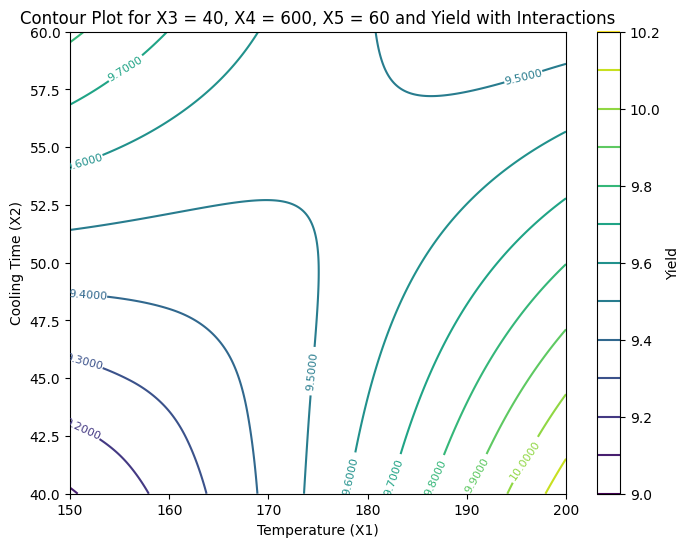

Contour data has been saved.


In [4]:
# 5 factor working code for cav 5 xyz dimension 2
# Holding factors at LOW

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from sklearn.linear_model import LinearRegression
import json

# Sample dataset with 5 factors
data = pd.DataFrame({
    'X1': [200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150],
    'X2': [60, 60, 60, 60, 60, 60, 60, 60, 40, 40, 40, 40, 40, 40, 40, 40, 60, 60, 60, 60, 60, 60, 60, 60, 40, 40, 40, 40, 40, 40, 40, 40],
    'X3': [80, 80, 80, 80, 40, 40, 40, 40, 80, 80, 80, 80, 40, 40, 40, 40, 80, 80, 80, 80, 40, 40, 40, 40, 80, 80, 80, 80, 40, 40, 40, 40],
    'X4': [1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600],
    'X5': [90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60],
    'Y': [10.69445,	10.12971,	10.43111,	8.868389,	10.22914,	9.453185,	11.012,	10.0296,	10.91824,
          9.134802,	9.546889,	9.905714,	10.70002,	10.1542,	10.67142,	10.02229,	10.40502,	10.15464,
          10.5603,	9.79976,	9.956398,	9.816927,	10.29819,	10.09452,	9.900414,	9.904663,	9.322984,	10.23669,	10.4791,	9.090896,	10.1765,	9.559209]
})

# Add interaction terms
data['X1_X2'] = data['X1'] * data['X2']
data['X1_X3'] = data['X1'] * data['X3']
data['X1_X4'] = data['X1'] * data['X4']
data['X1_X5'] = data['X1'] * data['X5']
data['X2_X3'] = data['X2'] * data['X3']
data['X2_X4'] = data['X2'] * data['X4']
data['X2_X5'] = data['X2'] * data['X5']
data['X3_X4'] = data['X3'] * data['X4']
data['X3_X5'] = data['X3'] * data['X5']
data['X4_X5'] = data['X4'] * data['X5']

# Prepare regression data
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X1_X2', 'X1_X3', 'X1_X4', 'X1_X5',
          'X2_X3', 'X2_X4', 'X2_X5', 'X3_X4', 'X3_X5', 'X4_X5']]
y = data['Y']

# Perform multiple linear regression
regressor = LinearRegression()
regressor.fit(X, y)

# Get regression coefficients and intercept
coefficients = regressor.coef_
intercept = regressor.intercept_

# Print regression results
print("Regression Coefficients:")
print(f"Intercept: {intercept:.6f}")
for i, col in enumerate(X.columns):
    print(f"Coefficient for {col}: {coefficients[i]:.6f}")

# Select specific values for X3, X4, X5
x3_value = 40
x4_value = 600
x5_value = 60
data_filtered = data[(data['X3'] == x3_value) & (data['X4'] == x4_value) & (data['X5'] == x5_value)]

# Extract filtered data points
X1 = data_filtered['X1'].values
X2 = data_filtered['X2'].values
Y = data_filtered['Y'].values

# Create a fine grid for X1 and X2
x1_range = np.linspace(min(X1), max(X1), 500)
x2_range = np.linspace(min(X2), max(X2), 500)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Interpolate Y values over the grid using cubic interpolation
y_grid = griddata((X1, X2), Y, (x1_grid, x2_grid), method='cubic')

# Generate contour plot
plt.figure(figsize=(8, 6))
num_contours = 10  # Number of contour levels
contour = plt.contour(x1_grid, x2_grid, y_grid, levels=num_contours, cmap='viridis')

# Extract the contour line data
def remove_duplicates(path):
    unique_points = list(dict.fromkeys(tuple(point) for point in path))
    return unique_points

contour_data = {}
for i, level in enumerate(contour.levels):
    paths = contour.allsegs[i]
    contour_data[f"Level {level:.4f}"] = [remove_duplicates(path.tolist()) for path in paths]

# Save contour data as JSON
contour_json = json.dumps(contour_data, indent=4)
file_path = "contour_data_with_interactions.json"  # Update the file path as needed
with open(file_path, "w") as f:
    f.write(contour_json)

# Show the contour plot
plt.clabel(contour, inline=True, fontsize=8, fmt="%.4f")  # Adding labels to the lines
plt.colorbar(contour, label='Yield')
plt.xlabel('Temperature (X1)')
plt.ylabel('Cooling Time (X2)')
plt.title(f'Contour Plot for X3 = {x3_value}, X4 = {x4_value}, X5 = {x5_value} and Yield with Interactions')
plt.show()

print("Contour data has been saved.")


In [5]:
# 5 factor working code for cav 5 xyz dimension 2
#Holding factors at MEDIUM

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from sklearn.linear_model import LinearRegression
import json

# Sample dataset with 5 factors
data = pd.DataFrame({
    'X1': [200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150],
    'X2': [60, 60, 60, 60, 60, 60, 60, 60, 40, 40, 40, 40, 40, 40, 40, 40, 60, 60, 60, 60, 60, 60, 60, 60, 40, 40, 40, 40, 40, 40, 40, 40],
    'X3': [80, 80, 80, 80, 40, 40, 40, 40, 80, 80, 80, 80, 40, 40, 40, 40, 80, 80, 80, 80, 40, 40, 40, 40, 80, 80, 80, 80, 40, 40, 40, 40],
    'X4': [1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600],
    'X5': [90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60],
    'Y': [10.69445,	10.12971,	10.43111,	8.868389,	10.22914,	9.453185,	11.012,	10.0296,	10.91824,
          9.134802,	9.546889,	9.905714,	10.70002,	10.1542,	10.67142,	10.02229,	10.40502,	10.15464,
          10.5603,	9.79976,	9.956398,	9.816927,	10.29819,	10.09452,	9.900414,	9.904663,	9.322984,	10.23669,	10.4791,	9.090896,	10.1765,	9.559209]
})

# Add interaction terms
data['X1_X2'] = data['X1'] * data['X2']
data['X1_X3'] = data['X1'] * data['X3']
data['X1_X4'] = data['X1'] * data['X4']
data['X1_X5'] = data['X1'] * data['X5']
data['X2_X3'] = data['X2'] * data['X3']
data['X2_X4'] = data['X2'] * data['X4']
data['X2_X5'] = data['X2'] * data['X5']
data['X3_X4'] = data['X3'] * data['X4']
data['X3_X5'] = data['X3'] * data['X5']
data['X4_X5'] = data['X4'] * data['X5']

# Prepare regression data
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X1_X2', 'X1_X3', 'X1_X4', 'X1_X5',
          'X2_X3', 'X2_X4', 'X2_X5', 'X3_X4', 'X3_X5', 'X4_X5']]
y = data['Y']

# Perform multiple linear regression
regressor = LinearRegression()
regressor.fit(X, y)

# Get regression coefficients and intercept
coefficients = regressor.coef_
intercept = regressor.intercept_

# Print regression results
print("Regression Coefficients:")
print(f"Intercept: {intercept:.6f}")
for i, col in enumerate(X.columns):
    print(f"Coefficient for {col}: {coefficients[i]:.6f}")

# Select specific values for X3, X4, X5
x3_value = 60
x4_value = 900
x5_value = 75
data_filtered = data[(data['X3'] == x3_value) & (data['X4'] == x4_value) & (data['X5'] == x5_value)]

# Extract filtered data points
X1 = data_filtered['X1'].values
X2 = data_filtered['X2'].values
Y = data_filtered['Y'].values

# Create a fine grid for X1 and X2
x1_range = np.linspace(min(X1), max(X1), 500)
x2_range = np.linspace(min(X2), max(X2), 500)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Interpolate Y values over the grid using cubic interpolation
y_grid = griddata((X1, X2), Y, (x1_grid, x2_grid), method='cubic')

# Generate contour plot
plt.figure(figsize=(8, 6))
num_contours = 10  # Number of contour levels
contour = plt.contour(x1_grid, x2_grid, y_grid, levels=num_contours, cmap='viridis')

# Extract the contour line data
def remove_duplicates(path):
    unique_points = list(dict.fromkeys(tuple(point) for point in path))
    return unique_points

contour_data = {}
for i, level in enumerate(contour.levels):
    paths = contour.allsegs[i]
    contour_data[f"Level {level:.4f}"] = [remove_duplicates(path.tolist()) for path in paths]

# Save contour data as JSON
contour_json = json.dumps(contour_data, indent=4)
file_path = "contour_data_with_interactions.json"  # Update the file path as needed
with open(file_path, "w") as f:
    f.write(contour_json)

# Show the contour plot
plt.clabel(contour, inline=True, fontsize=8, fmt="%.4f")  # Adding labels to the lines
plt.colorbar(contour, label='Yield')
plt.xlabel('Temperature (X1)')
plt.ylabel('Cooling Time (X2)')
plt.title(f'Contour Plot for X3 = {x3_value}, X4 = {x4_value}, X5 = {x5_value} and Yield with Interactions')
plt.show()

print("Contour data has been saved.")


Regression Coefficients:
Intercept: 6.663008
Coefficient for X1: 0.000019
Coefficient for X2: 0.000033
Coefficient for X3: 0.000029
Coefficient for X4: -0.000000
Coefficient for X5: -0.000000
Coefficient for X1_X2: -0.000328
Coefficient for X1_X3: -0.000216
Coefficient for X1_X4: -0.000011
Coefficient for X1_X5: 0.000559
Coefficient for X2_X3: 0.000334
Coefficient for X2_X4: -0.000034
Coefficient for X2_X5: 0.000994
Coefficient for X3_X4: -0.000052
Coefficient for X3_X5: 0.000866
Coefficient for X4_X5: -0.000019


ValueError: min() arg is an empty sequence

Regression Coefficients:
Intercept: 6.663008
Coefficient for X1: 0.000019
Coefficient for X2: 0.000033
Coefficient for X3: 0.000029
Coefficient for X4: -0.000000
Coefficient for X5: -0.000000
Coefficient for X1_X2: -0.000328
Coefficient for X1_X3: -0.000216
Coefficient for X1_X4: -0.000011
Coefficient for X1_X5: 0.000559
Coefficient for X2_X3: 0.000334
Coefficient for X2_X4: -0.000034
Coefficient for X2_X5: 0.000994
Coefficient for X3_X4: -0.000052
Coefficient for X3_X5: 0.000866
Coefficient for X4_X5: -0.000019


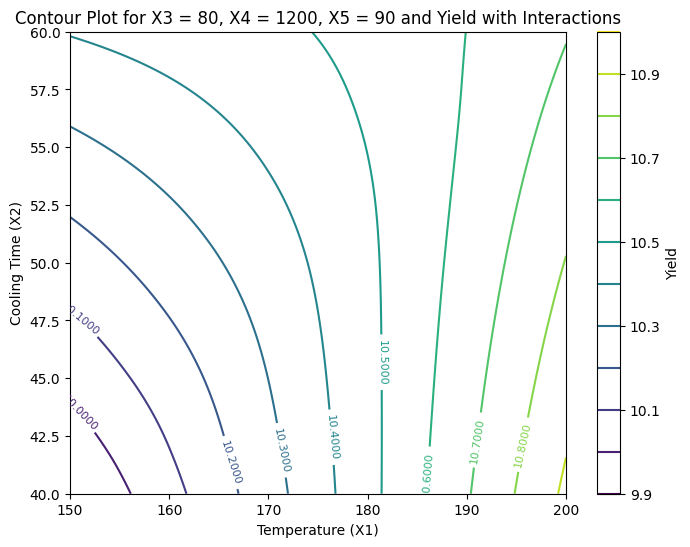

Contour data has been saved.


In [6]:
# 5 factor working code for cav 4 xyz dimension 2
#Holding the factors at HIGH

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from sklearn.linear_model import LinearRegression
import json

# Sample dataset with 5 factors
data = pd.DataFrame({
    'X1': [200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150],
    'X2': [60, 60, 60, 60, 60, 60, 60, 60, 40, 40, 40, 40, 40, 40, 40, 40, 60, 60, 60, 60, 60, 60, 60, 60, 40, 40, 40, 40, 40, 40, 40, 40],
    'X3': [80, 80, 80, 80, 40, 40, 40, 40, 80, 80, 80, 80, 40, 40, 40, 40, 80, 80, 80, 80, 40, 40, 40, 40, 80, 80, 80, 80, 40, 40, 40, 40],
    'X4': [1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600, 1200, 600],
    'X5': [90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60, 90, 60],
    'Y': [10.69445,	10.12971,	10.43111,	8.868389,	10.22914,	9.453185,	11.012,	10.0296,	10.91824,
          9.134802,	9.546889,	9.905714,	10.70002,	10.1542,	10.67142,	10.02229,	10.40502,	10.15464,
          10.5603,	9.79976,	9.956398,	9.816927,	10.29819,	10.09452,	9.900414,	9.904663,	9.322984,	10.23669,	10.4791,	9.090896,	10.1765,	9.559209]
})

# Add interaction terms
data['X1_X2'] = data['X1'] * data['X2']
data['X1_X3'] = data['X1'] * data['X3']
data['X1_X4'] = data['X1'] * data['X4']
data['X1_X5'] = data['X1'] * data['X5']
data['X2_X3'] = data['X2'] * data['X3']
data['X2_X4'] = data['X2'] * data['X4']
data['X2_X5'] = data['X2'] * data['X5']
data['X3_X4'] = data['X3'] * data['X4']
data['X3_X5'] = data['X3'] * data['X5']
data['X4_X5'] = data['X4'] * data['X5']

# Prepare regression data
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X1_X2', 'X1_X3', 'X1_X4', 'X1_X5',
          'X2_X3', 'X2_X4', 'X2_X5', 'X3_X4', 'X3_X5', 'X4_X5']]
y = data['Y']

# Perform multiple linear regression
regressor = LinearRegression()
regressor.fit(X, y)

# Get regression coefficients and intercept
coefficients = regressor.coef_
intercept = regressor.intercept_

# Print regression results
print("Regression Coefficients:")
print(f"Intercept: {intercept:.6f}")
for i, col in enumerate(X.columns):
    print(f"Coefficient for {col}: {coefficients[i]:.6f}")

# Select specific values for X3, X4, X5
x3_value = 80
x4_value = 1200
x5_value = 90
data_filtered = data[(data['X3'] == x3_value) & (data['X4'] == x4_value) & (data['X5'] == x5_value)]

# Extract filtered data points
X1 = data_filtered['X1'].values
X2 = data_filtered['X2'].values
Y = data_filtered['Y'].values

# Create a fine grid for X1 and X2
x1_range = np.linspace(min(X1), max(X1), 500)
x2_range = np.linspace(min(X2), max(X2), 500)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Interpolate Y values over the grid using cubic interpolation
y_grid = griddata((X1, X2), Y, (x1_grid, x2_grid), method='cubic')

# Generate contour plot
plt.figure(figsize=(8, 6))
num_contours = 10  # Number of contour levels
contour = plt.contour(x1_grid, x2_grid, y_grid, levels=num_contours, cmap='viridis')

# Extract the contour line data
def remove_duplicates(path):
    unique_points = list(dict.fromkeys(tuple(point) for point in path))
    return unique_points

contour_data = {}
for i, level in enumerate(contour.levels):
    paths = contour.allsegs[i]
    contour_data[f"Level {level:.4f}"] = [remove_duplicates(path.tolist()) for path in paths]

# Save contour data as JSON
contour_json = json.dumps(contour_data, indent=4)
file_path = "contour_data_with_interactions.json"  # Update the file path as needed
with open(file_path, "w") as f:
    f.write(contour_json)

# Show the contour plot
plt.clabel(contour, inline=True, fontsize=8, fmt="%.4f")  # Adding labels to the lines
plt.colorbar(contour, label='Yield')
plt.xlabel('Temperature (X1)')
plt.ylabel('Cooling Time (X2)')
plt.title(f'Contour Plot for X3 = {x3_value}, X4 = {x4_value}, X5 = {x5_value} and Yield with Interactions')
plt.show()

print("Contour data has been saved.")
